In [1]:
import wandb
import numpy as np
import pandas as pd
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from pypalettes import load_cmap

In [2]:
# #can use api to get run ids but have just donwloaded the flat cvs file instead. 
# import pandas as pd 
# import wandb
# api = wandb.Api()
# 
# # Project is specified by <entity/project-name>
# runs = api.runs("aaronwtr/perturbench")
# 
# summary_list, config_list, name_list = [], [], []
# for run in runs: 
#     # .summary contains the output keys/values for metrics like accuracy.
#     #  We call ._json_dict to omit large files 
#     summary_list.append(run.summary._json_dict)
# 
#     # .config contains the hyperparameters.
#     #  We remove special values that start with _.
#     config_list.append(
#         {k: v for k,v in run.config.items()
#           if not k.startswith('_')})
# 
#     # .name is the human-readable name of the run.
#     name_list.append(run.name)
# 
# runs_df = pd.DataFrame({
#     "summary": summary_list,
#     "config": config_list,
#     "name": name_list
#     })
# 
# #runs_df.to_csv("project.csv")

In [3]:
df = pd.read_csv('wandb_baseline.csv')
df_scgpt = pd.read_csv('scgpt.csv')
df_scbert = pd.read_csv('scbert.csv')
df_gf = pd.read_csv('gf.csv')
df_uce = pd.read_csv('uce.csv')
df_mean = pd.read_csv('mean.csv')

In [4]:
df_mean

,Name,Created,State,Runtime,End Time,Group,Tags,test/rmse,test/mse,train/mse,...,test/de_genes,model.optimizer.lr,model.net.hidden_dim,trainer.devices,trainer.accelerator,trainer.max_epochs,model.scheduler.patience,callbacks.early_stopping.patience,train/rmse,val/rmse
0,cerulean-water-254,2024-07-04T20:19:40.000Z,finished,31,2024-07-04T20:20:11.000Z,test_mean_norman_0.7,"eval, mean, norman, raw_expression, replicate_...",NaN,0.080102,NaN,...,NaN,NaN,NaN,1,cpu,20,NaN,NaN,NaN,NaN
1,woven-planet-255,2024-07-04T20:20:47.000Z,finished,31,2024-07-04T20:21:18.000Z,test_mean_norman_0.7,"eval, mean, norman, raw_expression, replicate_...",NaN,0.081777,NaN,...,NaN,NaN,NaN,1,cpu,20,NaN,NaN,NaN,NaN
2,scarlet-planet-253,2024-07-04T20:18:09.000Z,finished,31,2024-07-04T20:18:40.000Z,test_mean_norman_0.7,"eval, mean, norman, raw_expression, replicate_...",NaN,0.091005,NaN,...,NaN,NaN,NaN,1,cpu,20,NaN,NaN,NaN,NaN
3,bright-silence-251,2024-07-04T20:10:06.000Z,finished,29,2024-07-04T20:10:35.000Z,test_mean_norman_0.6,"eval, mean, norman, raw_expression, replicate_...",NaN,0.059539,NaN,...,NaN,NaN,NaN,1,cpu,20,NaN,NaN,NaN,NaN
4,robust-brook-252,2024-07-04T20:16:50.000Z,finished,29,2024-07-04T20:17:19.000Z,test_mean_norman_0.6,"eval, mean, norman, raw_expression, replicate_...",NaN,0.083301,NaN,...,NaN,NaN,NaN,1,cpu,20,NaN,NaN,NaN,NaN
5,fanciful-blaze-250,2024-07-04T20:03:52.000Z,finished,29,2024-07-04T20:04:21.000Z,test_mean_norman_0.6,"eval, mean, norman, raw_expression, replicate_...",NaN,0.079533,NaN,...,NaN,NaN,NaN,1,cpu,20,NaN,NaN,NaN,NaN
6,soft-wind-247,2024-07-04T19:59:49.000Z,finished,32,2024-07-04T20:00:21.000Z,test_mean_norman_0.5,"eval, mean, norman, raw_expression, replicate_...",NaN,0.063303,NaN,...,NaN,NaN,NaN,1,cpu,20,NaN,NaN,NaN,NaN
7,young-firebrand-248,2024-07-04T20:01:02.000Z,finished,32,2024-07-04T20:01:34.000Z,test_mean_norman_0.5,"eval, mean, norman, raw_expression, replicate_...",NaN,0.064631,NaN,...,NaN,NaN,NaN,1,cpu,20,NaN,NaN,NaN,NaN
8,misunderstood-galaxy-249,2024-07-04T20:02:18.000Z,finished,33,2024-07-04T20:02:51.000Z,test_mean_norman_0.5,"eval, mean, norman, raw_expression, replicate_...",NaN,0.071820,NaN,...,NaN,NaN,NaN,1,cpu,20,NaN,NaN,NaN,NaN
9,glamorous-pond-244,2024-07-04T19:54:59.000Z,finished,34,2024-07-04T19:55:33.000Z,test_mean_norman_0.4,"eval, mean, norman, raw_expression, replicate_...",NaN,0.067978,NaN,...,NaN,NaN,NaN,1,cpu,20,NaN,NaN,NaN,NaN


In [5]:
df_uce.head()

,Name,Tags,ID,State,Notes,User,Group,Job Type,Created,End Time,...,trainer.accelerator,trainer.check_val_every_n_epoch,trainer.default_root_dir,trainer.deterministic,trainer.devices,trainer.max_epochs,trainer.min_epochs,trainer.num_sanity_val_steps,lr-Adam,trainer/global_step
0,comfy-bush-157,"hpo, mlp, norman, replicate_1, split_0.0, uce",77jprb1j,finished,-,NaN,mlp_norman_0.0,NaN,2024-06-06T06:18:13.000Z,2024-06-06T06:31:39.000Z,...,gpu,1,${paths.output_dir},False,1,100,1,0,0.000005,14877
1,blooming-firefly-156,"hpo, mlp, norman, replicate_2, split_0.0, uce",3hse70sy,finished,-,NaN,mlp_norman_0.0,NaN,2024-06-06T06:18:12.000Z,2024-06-06T06:31:32.000Z,...,gpu,1,${paths.output_dir},False,1,100,1,0,0.000005,15064
2,vibrant-durian-154,"hpo, mlp, norman, replicate_0, split_0.0, uce",huh2rcsg,finished,-,NaN,mlp_norman_0.0,NaN,2024-06-06T06:17:32.000Z,2024-06-06T06:23:02.000Z,...,gpu,1,${paths.output_dir},False,1,100,1,0,0.000005,15120
3,dark-sun-174,"hpo, mlp, norman, replicate_1, split_0.1, uce",gdf259uk,finished,-,NaN,mlp_norman_0.1,NaN,2024-06-06T06:32:08.000Z,2024-06-06T06:44:39.000Z,...,gpu,1,${paths.output_dir},False,1,100,1,0,0.000005,12690
4,decent-monkey-173,"hpo, mlp, norman, replicate_2, split_0.1, uce",42l9mg7t,finished,-,NaN,mlp_norman_0.1,NaN,2024-06-06T06:32:05.000Z,2024-06-06T06:44:31.000Z,...,gpu,1,${paths.output_dir},False,1,100,1,0,0.000005,12615


In [6]:
df_scgpt.head()

,Name,Tags,Group,Created,Runtime,test/mse,test_baseline/mse,test_de/mse,train/mse,val/mse,model.optimizer.lr,data.replicate
0,rose-sunset-38,"IKZF3_de, eval, mlp, norman, replicate_1, scgp...",test_mlp_norman_0.7,2024-06-06T06:14:03.000Z,30,NaN,4.769367,4.788578,NaN,NaN,0.001000,1
1,polar-waterfall-35,"SLC4A1_de, eval, mlp, norman, replicate_2, scg...",test_mlp_norman_0.0,2024-06-06T06:02:33.000Z,33,NaN,0.232880,0.236304,NaN,NaN,0.001000,2
2,charmed-fire-154,"hpo, mlp, norman, replicate_0, split_0.7",mlp_norman_0.7,2024-06-06T05:44:32.000Z,74,0.082474,NaN,NaN,0.063037,0.063802,0.000005,2
3,visionary-spaceship-153,"hpo, mlp, norman, replicate_1, split_0.7",mlp_norman_0.7,2024-06-06T05:33:21.000Z,56,0.269525,NaN,NaN,0.258051,0.256108,0.000005,1
4,olive-salad-152,"hpo, mlp, norman, replicate_0, split_0.6",mlp_norman_0.6,2024-06-06T05:32:09.000Z,59,0.204363,NaN,NaN,0.198647,0.198320,0.000005,0


plt.style.use("seaborn")

## MSE plots for spectral params

In [7]:
spectral_params = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'] #'0.8']
def find_mets_by_spectral_params(model, metric_name, raw_data):
    '''find tabular metrics grouped by the spectral params'''
    met_by_sp = {}
    for sp in spectral_params:
        debug_check = f"{model}_{sp}"
        sp_sub = raw_data[raw_data['Group'] == f'{model}_{sp}']
        # if sp_sub[metric_name].isna().all():
        #     met_by_sp[f'{model}_{sp}'] = sp_sub['test/rmse'].values
        # else:
        met_by_sp[f'{model}_{sp}'] = sp_sub[metric_name].values
    return pd.DataFrame(met_by_sp)

def find_spectral_auc(metric_df):
    x = np.array(spectral_params, dtype='float')
    y = metric_df.mean() 
    yerr = metric_df.std() / (len(metric_df) ** 0.5 ) #Standard error for err bar
    mean_yerr = yerr.mean()
    return auc(x, y), mean_yerr

def plot_spectral_curve(metric_df, err='standard_error', zero_ylb=False, shading=True, errbar=True, c="#D1E7FF", alpha=0.8,
                        plot_shading_c_same=True):
    x = np.array(spectral_params, dtype='float')
    y = metric_df.mean()
    if err == 'standard_error':
        yerr = metric_df.std() / (len(metric_df) ** 0.5 ) #Standard error for err bar 
    
    if errbar: #safe to remove if we go with fill_between for errors
        plt.errorbar(x, y, yerr=yerr, color='k', capsize = 3,elinewidth=1.5, linewidth=1.0)    
    else:
        if plot_shading_c_same:
            plot_c = c
        else:
            plot_c = 'k'
        plt.plot(x, y, color=plot_c, linestyle='dashed', marker='o', linewidth=0.5)
        y_lower = y - yerr
        y_upper = y + yerr
        plt.fill_between(x, y_lower, y_upper, color=c, alpha=alpha, 
        #edgecolor='#aad3ff'
        )
    axes = plt.gca()
    y_min, _ = axes.get_ylim()
    #
    if zero_ylb:
        y_min = 0
    if shading:
        plt.fill_between(x=x, y1=y, y2=y_min, color= "#D1E7FF", alpha=1.0)
    
    plt.xlabel('Sparsification Probability')
    plt.ylabel('MSE')


def find_auspc_table(all_model_raw_dfs, model_names, probe_model_ds='mlp_norman', metric_name='test/mse'):
    '''probe_model_ds named in Group col in df above 
    metric_name  name of col for metric of intrest
    '''
    table_auc = {}
    table_yerr = {}
    for m_name, dft in zip(model_names, all_model_raw_dfs):
        if m_name != 'Mean baseline':
            auc, yerr = find_spectral_auc(find_mets_by_spectral_params(probe_model_ds, metric_name, dft))
        else:
            auc, yerr = find_spectral_auc(find_mets_by_spectral_params("test_mean_norman", metric_name, dft))
            
        table_auc[m_name] = auc
        table_yerr[m_name] = yerr
    return table_auc, table_yerr

In [27]:
probe_model_ds = 'mlp_norman' #as named in Group col in df above
metric_name  = 'test/mse' #name of col for metric of intrest
test_mse = find_mets_by_spectral_params(probe_model_ds, metric_name, df)
test_mse_scgpt = find_mets_by_spectral_params(probe_model_ds, metric_name, df_scgpt)
test_mse_scbert = find_mets_by_spectral_params(probe_model_ds, metric_name, df_scbert)
test_mse_gf = find_mets_by_spectral_params(probe_model_ds, metric_name, df_gf)
test_mse_uce = find_mets_by_spectral_params(probe_model_ds, metric_name, df_uce)
test_mse_mean = find_mets_by_spectral_params("test_mean_norman", metric_name, df_mean)

find_spectral_auc(test_mse), find_spectral_auc(test_mse_scbert), find_spectral_auc(test_mse_scgpt), find_spectral_auc(test_mse_gf), find_spectral_auc(test_mse_uce), find_spectral_auc(test_mse_mean)

((0.04582182324180996, 0.002822225544212864),
 (0.046432694233953915, 0.0034422529623271154),
 (0.054449938237667056, 0.015441335782538222),
 (0.04651279722650843, 0.003086406005235603),
 (0.04647184285968472, 0.0031153169450602613),
 (0.04611667400846875, 0.003171203390603614))

In [9]:
probe_model_ds

'mlp_norman'

In [26]:
test_mse_mean = find_mets_by_spectral_params(probe_model_ds, metric_name, df_mean)
find_spectral_auc(test_mse_mean)

(nan, nan)

In [11]:
auc_table, yerr_table = find_auspc_table([df, df_scbert, df_scgpt, df_gf, df_uce, df_mean], model_names=['MLP gene expression', 'scbert', 'scgpt', 'gf', 'uce', 'Mean baseline'])
auc_table = pd.Series(auc_table).sort_values()

In [12]:
auc_table

MLP gene expression    0.045822
Mean baseline          0.046117
scbert                 0.046433
uce                    0.046472
gf                     0.046513
scgpt                  0.054450
dtype: float64

### Box plot for aucpr

In [13]:
table

NameError: name 'table' is not defined

([0, 0, 0, 0, 0, 0], [0.002822225544212864, 0.003171203390603614, 0.0034422529623271154, 0.0031153169450602613, 0.003086406005235603, 0.015441335782538222])


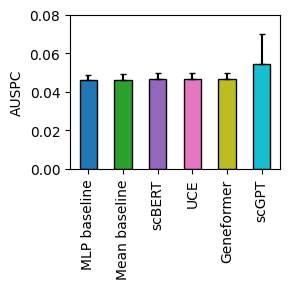

In [14]:
plt.figure(figsize=(3, 3))
table, yerr = find_auspc_table([df_mean, df, df_scbert, df_scgpt, df_gf, df_uce, df_scgpt], model_names=['Mean baseline', 'MLP baseline', 'scBERT', 'scGPT', 'Geneformer', 'UCE'])
table = pd.Series(table).sort_values()

# Extract yerr values in the same order as the sorted table
yerr_values = [yerr[model] for model in table.index]

# Use the custom dark blue colormap
cmap = load_cmap('Classic_10')
bar_colors = [cmap(i/5) for i in range(6)]
width = 0.5

yerr_top_only = ([0] * len(yerr_values), yerr_values)
print(yerr_top_only)

# Add error bars to the bar plot
bars = plt.bar(table.index, table, width, color=bar_colors, alpha=1.0, yerr=yerr_top_only, capsize=2, linewidth=1, edgecolor='black', ecolor='black')

plt.ylabel('AUSPC')
plt.xticks(rotation=90)
plt.ylim(0.0, 0.08)
plt.tight_layout()
plt.savefig('paper_figs/auspc_bar_1.pdf', dpi=300)
plt.show()

In [15]:
((test_mse - test_mse_scgpt) > 0).sum().sum() #scgpt only beats baseline for 2 splits

9

In [16]:
((test_mse - test_mse_gf) > 0).sum().sum()  #gf beats baseline for 6 splits,

11

In [17]:
find_spectral_auc(test_mse_gf[test_mse_gf < 0.1]), find_spectral_auc(test_mse_scgpt[test_mse_scgpt < 0.1])

((0.04651279722650843, 0.003086406005235603),
 (0.046918558143079256, 0.0032520311826646268))

#### auc table and plots

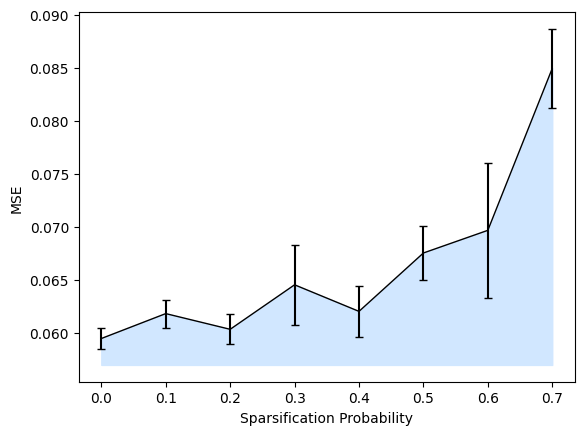

In [18]:
#current plot that we think well use
plt.style.use('default')
plot_spectral_curve(test_mse, shading=True, errbar=True, plot_shading_c_same=False)
plt.savefig('paper_figs/baseline_full_spec_curve.pdf', dpi=300)
plt.show()

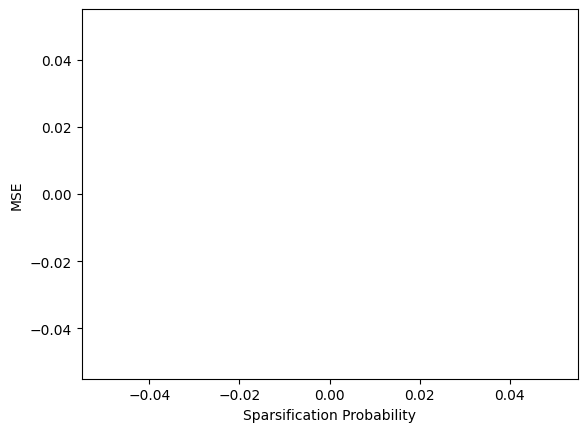

In [19]:
plot_spectral_curve(test_mse_mean, shading=True, errbar=True, plot_shading_c_same=False)
plt.savefig('paper_figs/mean_full_spec_curve.pdf', dpi=300)

/var/folders/km/jgnm5nbx7tg_j37y7_0657q00000gn/T/ipykernel_96720/3025055262.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20b', n_models)


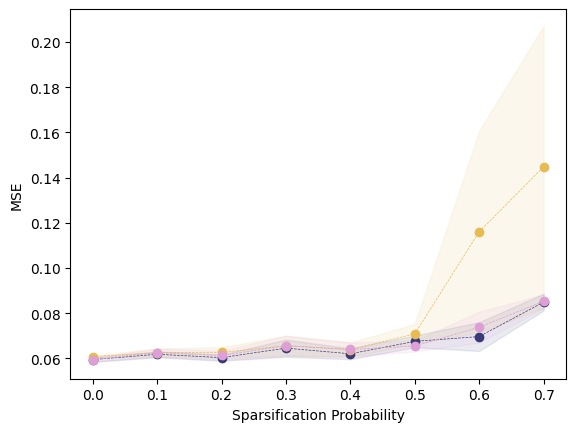

In [20]:
n_models = 3
cmap = plt.cm.get_cmap('tab20b', n_models) 
bar_colors = [cmap(i) for i in range(n_models)]
alpha = 1
plot_spectral_curve(test_mse, shading=False, errbar=False, c=bar_colors[0], alpha=alpha* 0.1)
plot_spectral_curve(test_mse_scgpt, shading=False, errbar=False, c=bar_colors[1], alpha=alpha * 0.1)
#plot_spectral_curve(test_mse_scgpt, shading=False, errbar=False, c=bar_colors[1], alpha=alpha * 0.1)
plot_spectral_curve(test_mse_gf, shading=False, errbar=False, c=bar_colors[2], alpha=alpha * 0.1)
#plt.yscale('log',  base=2)

### Above but with bar plots instead of scatter plots

In [21]:
model_names=['Baseline', 'UCE', 'Geneformer', 'scGPT', 'scBERT']
model_mses = [test_mse, test_mse_uce, test_mse_gf, test_mse_scgpt, test_mse_scbert]

In [22]:
np.arange(-len(model_names)/2 + 1, len(model_names)/2 - 0.5, 0.5) 

array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5])

In [23]:
len(model_names), len(dists_from_cent)

NameError: name 'dists_from_cent' is not defined

Mean baseline
   test_mean_norman_0.0  test_mean_norman_0.1  test_mean_norman_0.2  \
0              0.057263              0.059230              0.058104   
1              0.061470              0.061275              0.058172   
2              0.058753              0.064803              0.063119   

   test_mean_norman_0.3  test_mean_norman_0.4  test_mean_norman_0.5  \
0              0.071861              0.067978              0.063303   
1              0.057770              0.056305              0.064631   
2              0.065290              0.062279              0.071820   

   test_mean_norman_0.6  test_mean_norman_0.7  
0              0.059539              0.080102  
1              0.083301              0.081777  
2              0.079533              0.091005  
MLP baseline
   mlp_norman_0.0  mlp_norman_0.1  mlp_norman_0.2  mlp_norman_0.3  \
0        0.058050        0.062443        0.058599        0.058564   
1        0.061361        0.063751        0.063129        0.071585   
2   

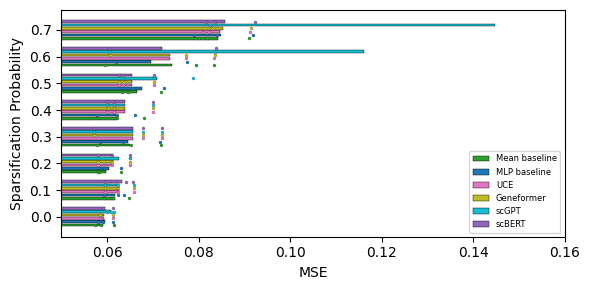

In [28]:
model_names = ['Mean baseline', 'MLP baseline', 'UCE', 'Geneformer', 'scGPT', 'scBERT']
model_mses = [test_mse_mean, test_mse, test_mse_uce, test_mse_gf, test_mse_scgpt, test_mse_scbert]


spectral_params = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'] 
x_labels = spectral_params
bars = []
#dists_from_cent = np.arange(-len(model_names)/2 + 1, len(model_names)/2 - 0.5, 0.5) #needs to be equal to the number of modles with equal spacing
dists_from_cent = [-1.25, -0.75, -0.25, 0.25, 0.75, 1.25]  #for 4 modles needs to be manulaly set for a n modles amount
plt.figure(figsize=(6, 3))
#dists_from_cent = [-0.5, 0, 0.5]
#e.g. [-1.5, -0.5, 0,  0.5, 1.5] for modles
assert len(dists_from_cent) == len(model_names)
pivot = np.arange(len(x_labels)) # pivot points for bars/ticks

# viridis = plt.cm.get_cmap('viridis', 256)
# newcolors = viridis(np.linspace(0.2, 0.8, 256))
# dark_blue = LinearSegmentedColormap.from_list('dark_blue', newcolors)

# Use the custom dark blue colormap
cmap = load_cmap('Classic_10')
bar_colors = [cmap(i/5) for i in range(6)]
width = 0.5

model_colors = {
    'MLP baseline': bar_colors[0],
    'Mean baseline': bar_colors[1],
    'scBERT': bar_colors[2],
    'UCE': bar_colors[3],
    'Geneformer': bar_colors[4],
    'scGPT': bar_colors[5]
}

width = 0.1
for model, m_mse, dis_from_cent in zip(model_names, model_mses, dists_from_cent):
    print(model)
    print(m_mse)
    c = model_colors[model]
    y = m_mse.mean()
    bar = [p + (dis_from_cent * width * 2.5) for p in pivot]
    bars.append(bar)
    plt.barh(bar, y, width, alpha=1.0,
    label=model,
    color=c,
    linewidth=0.3, 
    edgecolor='black', 
    ecolor='black'
    #yerr=m_mse.std()
    )
    for rep in m_mse.iterrows():
        plt.scatter(rep[1], bar, color=c, edgecolors='black', linewidths=0.1, s=5)

plt.yticks(np.arange(8), spectral_params) #rotation='vertical')
plt.xlabel('MSE')
plt.ylabel('Sparsification Probability')
plt.legend(loc='lower right', fontsize=6)
#plt.xlim(0.05, 0.17)
plt.xlim(0.05, 0.16)
#plt.show()
#plt.yscale('log',  base=2)
#plt.bar(baseline_ba)
plt.tight_layout()
plt.savefig('paper_figs/bar_all_sp_mse.pdf', dpi=300)
plt.show()


### Tables for all spesctral params

In [20]:
all_mean = {}
all_sd = {}
for m_name, m_mses in zip(model_names, model_mses):
    m_ave_mse = m_mses.mean(axis=0)
    m_sd_mse = m_mses.std(axis=0)
    new_idx = pd.Index([idx.split('_')[-1] for idx in m_ave_mse.index])
    m_ave_mse.index = new_idx
    m_sd_mse.index = new_idx
    all_mean[m_name] = pd.DataFrame(m_ave_mse)
    all_sd[m_name] = pd.DataFrame(m_sd_mse)

all_mean_df = pd.concat(all_mean, axis=1)
all_sd_df = pd.concat(all_sd, axis=1)
all_mean_df.columns = model_names
all_sd_df.columns = model_names

In [21]:
all_mean_df

,Baseline,UCE,Geneformer,scGPT,scBERT
0.0,0.059489,0.059371,0.059382,0.060785,0.059654
0.1,0.061836,0.062576,0.062574,0.062569,0.063167
0.2,0.060356,0.061320,0.061317,0.062621,0.061316
0.3,0.064548,0.065654,0.065652,0.065641,0.065651
0.4,0.062046,0.063870,0.063953,0.063901,0.063881
0.5,0.067545,0.065514,0.065496,0.070877,0.065502
0.6,0.069679,0.073704,0.073822,0.116098,0.072048
0.7,0.084928,0.084787,0.085245,0.144799,0.085871


In [22]:
all_sd_df

,Baseline,UCE,Geneformer,scGPT,scBERT
0.0,0.001697,0.001600,0.001619,0.000753,0.001397
0.1,0.002281,0.003159,0.003167,0.003150,0.003274
0.2,0.002430,0.003563,0.003564,0.004069,0.003561
0.3,0.006574,0.007650,0.007638,0.007645,0.007616
0.4,0.004157,0.005441,0.005383,0.005437,0.005429
0.5,0.004482,0.004177,0.004172,0.007581,0.004146
0.6,0.011036,0.012003,0.011838,0.077311,0.016559
0.7,0.006448,0.005576,0.005386,0.108016,0.005716


## Plots and table for differentally expressed genes 

In [57]:
#diff expressed gene results have _de in there tags find idx of de gene
def find_diff_expres_subset(raw_results_df):
    diff_expres_idx = []
    diff_expres_genes = []
    for i, t in enumerate(raw_results_df['Tags']):
        print(t)
        if '_de' in t.split(',')[0]:
            diff_expres_idx.append(i)
            diff_expres_genes.append(t.split('_')[0])

    de_df = raw_results_df.iloc[diff_expres_idx].copy(deep=True)
    de_df['diff_express_gene'] = diff_expres_genes
    #drop missing (old perts we considered)
    de_df = de_df[~de_df['test_baseline/mse'].isna()]

    return diff_expres_idx, diff_expres_genes, de_df

def find_de_mets_by_gene(diff_express_df, sp, model, metrics=['test_baseline/mse', 'test_de/mse']):
    '''find tabular metrics grouped by de gene for a given (sp) spectral param'''
    results = {}
    sp_subset = diff_express_df[diff_express_df['Group'] == f'test_{model}_{sp}']
    for g in sp_subset['diff_express_gene']:
        de_df_subset = sp_subset[sp_subset['diff_express_gene'] == g]
        results[g] = de_df_subset[metrics]
    return results

def create_de_table(de_results_dict, models_name_mapping):
    #tabular results 
    print(de_results_dict)
    de_tab = pd.concat(de_results_dict)
    if isinstance(de_tab, pd.Series):
        de_tab = pd.DataFrame(de_tab)
    #fmt table
    cols = [models_name_mapping[l] for l in de_tab.columns]
    de_tab.columns = cols
    new_idx = [idx[0] for idx in de_tab.index]
    de_tab.index = new_idx
    de_tab = de_tab.T.sort_values(by=new_idx[0])
    return de_tab

In [58]:
#subset raw results to just differenctal expression results 
diff_expres_idx, diff_expres_genes, de_df = find_diff_expres_subset(df_scgpt)

de_df
#*_, de_df_r2 = find_diff_expres_subset(df2)

IKZF3_de, eval, mlp, norman, replicate_1, scgpt, split_0.7
SLC4A1_de, eval, mlp, norman, replicate_2, scgpt, split_0.0
hpo, mlp, norman, replicate_0, split_0.7
hpo, mlp, norman, replicate_1, split_0.7
hpo, mlp, norman, replicate_0, split_0.6
hpo, mlp, norman, replicate_1, split_0.6
hpo, mlp, norman, replicate_2, split_0.7
hpo, mlp, norman, replicate_0, split_0.5
hpo, mlp, norman, replicate_1, split_0.5
hpo, mlp, norman, replicate_2, split_0.6
hpo, mlp, norman, replicate_0, split_0.4
hpo, mlp, norman, replicate_1, split_0.4
hpo, mlp, norman, replicate_2, split_0.5
hpo, mlp, norman, replicate_0, split_0.3
hpo, mlp, norman, replicate_2, split_0.4
hpo, mlp, norman, replicate_1, split_0.3
hpo, mlp, norman, replicate_2, split_0.3
hpo, mlp, norman, replicate_0, split_0.2
hpo, mlp, norman, replicate_1, split_0.2
hpo, mlp, norman, replicate_0, split_0.1
hpo, mlp, norman, replicate_1, split_0.1
hpo, mlp, norman, replicate_2, split_0.1
hpo, mlp, norman, replicate_0, split_0.2
hpo, mlp, norman, re

,Name,Tags,Group,Created,Runtime,test/mse,test_baseline/mse,test_de/mse,train/mse,val/mse,model.optimizer.lr,data.replicate,diff_express_gene
0,rose-sunset-38,"IKZF3_de, eval, mlp, norman, replicate_1, scgp...",test_mlp_norman_0.7,2024-06-06T06:14:03.000Z,30,NaN,4.769367,4.788578,NaN,NaN,0.001,1,IKZF3
1,polar-waterfall-35,"SLC4A1_de, eval, mlp, norman, replicate_2, scg...",test_mlp_norman_0.0,2024-06-06T06:02:33.000Z,33,NaN,0.232880,0.236304,NaN,NaN,0.001,2,SLC4A1


### table of de results

In [59]:
#sp and probe_model_ds should be the same for all de_sp dfs created
sp = 0.0
probe_model_ds = 'mlp_norman'

#name will change depending on fm model used 
models_name_mapping = {'test_baseline/mse': 'Mean gene expression', 'test_de/mse' : 'scGPT'} 

de_sp0 = find_de_mets_by_gene(de_df, sp, probe_model_ds)
de_sp0_tab = create_de_table(de_sp0, models_name_mapping)

{'SLC4A1':    test_baseline/mse  test_de/mse
1            0.23288     0.236304}


In [26]:
pd.concat((de_sp0_tab, de_sp0_r2_tab))

NameError: name 'de_sp0_r2_tab' is not defined

In [60]:
sp = 0.7
probe_model_ds = 'mlp_norman'
models_name_mapping = {'test_baseline/mse': 'Mean gene expression', 'test_de/mse' : 'scGPT'}
de_sp7 = find_de_mets_by_gene(de_df, sp, probe_model_ds)
de_sp7_tab = create_de_table(de_sp7, models_name_mapping)
#de_sp0_r2_tab = create_de_table(de_sp0_r2, models_name_mapping)
de_sp7_tab

{'IKZF3':    test_baseline/mse  test_de/mse
0           4.769367     4.788578}


,IKZF3
Mean gene expression,4.769367
scGPT,4.788578


### box plots of de results

In [61]:
def de_boxplot(de_results_dict, pert, models_name_mapping):
    y = de_results_dict[pert]
    assert len(y) == 1 #no reps 
    y = y.iloc[0].sort_values(ascending=True)
    
    # Filter the DataFrame to only include the 'MLP probe' data
    y_mlp_probe = y.loc[['test_de/mse']]
    
    # Extract the 'Mean gene expression' value
    mean_gene_expression = y.loc['test_baseline/mse']
    
    bar_labels = [models_name_mapping[l] for l in y_mlp_probe.index]
    
    if 'Baseline' in model_colors.keys():
        color_value = model_colors['Baseline']
        del model_colors['Baseline']
        model_colors['MLP gene expression'] = color_value

    bar_colors = [model_colors[l] for l in bar_labels]
    
    # Plot the 'MLP probe' data as a bar
    plt.bar(bar_labels, y_mlp_probe, label=bar_labels, color=bar_colors, alpha=1, width=0.5)
    
    plt.xlim(-0.5, 0.5)
    plt.ylim(0.0, 0.30)
    plt.xticks([])
    
    # Plot the 'Mean gene expression' value as a dashed horizontal line
    plt.axhline(mean_gene_expression, color="black", linestyle='--', label=models_name_mapping['test_baseline/mse'])
    
    plt.xlabel(f'{pert}')
    plt.ylabel('MSE')
    plt.legend()
    plt.savefig('paper_figs/de_boxplot_sp0_scgpt.pdf', dpi=300)
    plt.show()

In [62]:
models_name_mapping

{'test_baseline/mse': 'Mean gene expression', 'test_de/mse': 'scGPT'}

In [30]:
de_sp0

{'SLC4A1':    test_baseline/mse  test_de/mse
 1            0.23288     0.236304}

In [31]:
# perts = SLC4A1; sp0.0
# IKZF3; sp0.7

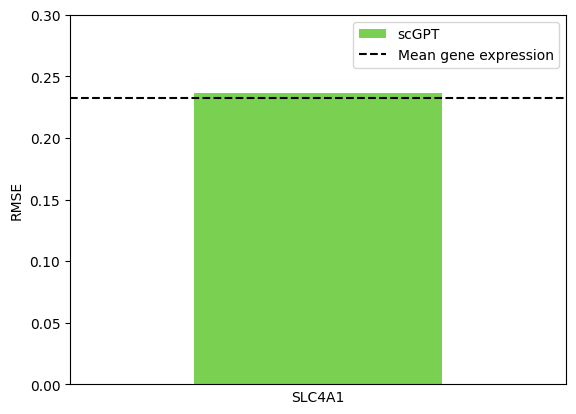

In [65]:
#just using SLC4A1 pert for sp of zero
# TODO: Display all in one plot by subtracting performance of mean gene expression from the performance of the model
pert = 'SLC4A1'
models_name_mapping = {'test_baseline/mse': 'Mean gene expression', 'test_de/mse' : 'scGPT'} 
de_boxplot(de_sp0, pert, models_name_mapping)
# plt.show()

In [33]:
all_de_df = pd.read_csv('all_de_results.csv')

In [34]:
all_de_df.head()

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,callbacks.early_stopping._target_,callbacks.early_stopping.check_finite,...,trainer.deterministic,trainer.devices,trainer.max_epochs,trainer.min_epochs,trainer.num_sanity_val_steps,epoch,test/de_genes,test_baseline/mse,test_de/mse,trainer/global_step
0,dazzling-night-3,finished,-,NaN,"SLC4A1_de, eval, mlp, norman, replicate_2, spl...",2024-06-06T14:37:10.000Z,33,NaN,lightning.pytorch.callbacks.EarlyStopping,True,...,False,1,20,1,0,0,20,0.438661,0.473454,0
1,ruby-glitter-2,finished,-,NaN,"IKZF3_de, eval, mlp, norman, replicate_1, spli...",2024-06-06T14:33:58.000Z,31,NaN,lightning.pytorch.callbacks.EarlyStopping,True,...,False,1,20,1,0,0,20,0.093333,0.103557,0
2,fresh-shadow-4,finished,-,NaN,"IKZF3_de, eval, geneformer, mlp, norman, repli...",2024-06-06T14:10:10.000Z,31,NaN,lightning.pytorch.callbacks.EarlyStopping,True,...,False,1,20,1,0,0,20,0.265499,0.328213,0
3,polar-frost-2,finished,-,NaN,"SLC4A1_de, eval, geneformer, mlp, norman, repl...",2024-06-06T14:01:40.000Z,34,NaN,lightning.pytorch.callbacks.EarlyStopping,True,...,False,1,20,1,0,0,20,0.343757,0.342390,0
4,cosmic-meadow-27,finished,-,NaN,"IKZF3_de, eval, mlp, norman, replicate_0, scbe...",2024-06-06T06:33:56.000Z,30,NaN,lightning.pytorch.callbacks.EarlyStopping,True,...,False,1,20,1,0,0,20,0.051365,0.341296,0


In [35]:
# get all the rows from all_de_df that have SLC4A1_de in the Tags 
slc4a1_de = all_de_df[all_de_df['Tags'].str.contains('SLC4A1_de')]

In [66]:
slc4a1_de

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,callbacks.early_stopping._target_,callbacks.early_stopping.check_finite,...,trainer.deterministic,trainer.devices,trainer.max_epochs,trainer.min_epochs,trainer.num_sanity_val_steps,epoch,test/de_genes,test_baseline/mse,test_de/mse,trainer/global_step
0,dazzling-night-3,finished,-,NaN,"SLC4A1_de, eval, mlp, norman, replicate_2, spl...",2024-06-06T14:37:10.000Z,33,NaN,lightning.pytorch.callbacks.EarlyStopping,True,...,False,1,20,1,0,0,20,0.438661,0.473454,0
3,polar-frost-2,finished,-,NaN,"SLC4A1_de, eval, geneformer, mlp, norman, repl...",2024-06-06T14:01:40.000Z,34,NaN,lightning.pytorch.callbacks.EarlyStopping,True,...,False,1,20,1,0,0,20,0.343757,0.342390,0
5,firm-blaze-26,finished,-,NaN,"SLC4A1_de, eval, mlp, norman, replicate_0, scb...",2024-06-06T06:28:16.000Z,36,NaN,lightning.pytorch.callbacks.EarlyStopping,True,...,False,1,20,1,0,0,20,0.249124,0.490381,0
7,polar-waterfall-35,finished,-,NaN,"SLC4A1_de, eval, mlp, norman, replicate_2, scg...",2024-06-06T06:02:33.000Z,33,NaN,lightning.pytorch.callbacks.EarlyStopping,True,...,False,1,20,1,0,0,20,0.232880,0.236304,0
9,youthful-hill-37,finished,-,NaN,"SLC4A1_de, eval, mlp, norman, replicate_0, spl...",2024-06-05T02:28:56.000Z,43,NaN,NaN,NaN,...,False,1,20,1,0,0,20,0.383467,0.370128,0


In [67]:
ikzf3_de = all_de_df[all_de_df['Tags'].str.contains('IKZF3_de')]

In [68]:
net_de_mses_dict_slc4a1 = {}
net_de_mses_dict_ikzf3 = {}

uce
geneformer
scbert
scgpt
raw_expression


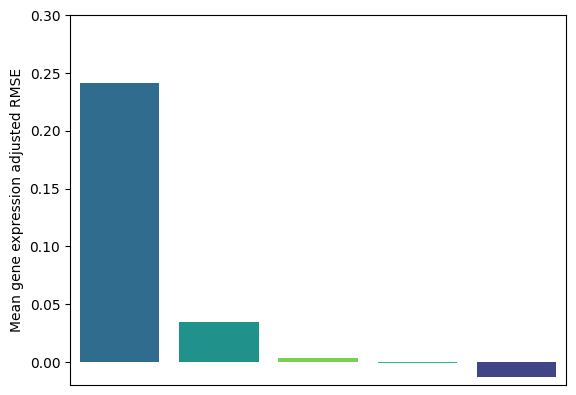

In [77]:
# loop through the rows of the slc4a1 dataframe
# todo: display plot in decreasing order and make inset in overleaf
bar_labels = []
bar_colors = []
net_de_mses = []

scale_plot_1 = {}
models_name_mapping = {
    'scgpt': 'scGPT',
    'scbert': 'scBERT',
    'geneformer': 'Geneformer',
    'uce': 'UCE',
    'raw_expression': 'MLP gene expression'
}
for i, row in slc4a1_de.iterrows():
    model = row['data.fm']
    print(model)
    baseline = row['test_baseline/mse'] 
    de_mse = row['test_de/mse'] 
    net_de_mse = de_mse - baseline
    
    # if net_de_mse > 0.05:
    #      continue
    
    net_de_mses.append(de_mse - baseline)
    
    net_de_mses_dict_slc4a1[model] = de_mse - baseline
    
    if model != 'raw_expression':
        scale_plot_1[model] = de_mse - baseline
    
    bar_labels.append(models_name_mapping[model])
    
    if 'Baseline' in model_colors.keys():
        color_value = model_colors['Baseline']
        del model_colors['Baseline']
        model_colors['MLP gene expression'] = color_value

    bar_colors.append(model_colors[models_name_mapping[model]])

# Combine net_de_mses, bar_labels, and bar_colors into a single list of tuples
data = list(zip(net_de_mses, bar_labels, bar_colors))

# Sort this list in descending order based on the net_de_mses values
data.sort(key=lambda x: x[0], reverse=True)

# Split the sorted list back into net_de_mses, bar_labels, and bar_colors
net_de_mses, bar_labels, bar_colors = zip(*data)

# print(net_de_mses)
# plt.gca().yaxis.tick_right()
# plt.gca().yaxis.set_label_position("right")
x = np.arange(len(net_de_mses))
plt.bar(x, net_de_mses, label=bar_labels, color=bar_colors, alpha=1)
plt.xticks([])  # Set the x-ticks to be the bar labels
plt.xlim(-0.5, len(bar_labels) - 0.5)  # Adjust the x-limits to match the number of bars

plt.ylim(-0.02, 0.30)
#plt.title('SLC4A1')
plt.ylabel('Mean gene expression adjusted MSE')
# plt.legend()
# plt.savefig('paper_figs/de_boxplot_sp0_0.pdf', dpi=300)
plt.show()

In [70]:
pretrain_size = {
    'scbert': 5*(10**6),
    'geneformer': 30*(10**6),
    'scgpt': 33*(10**6),
    'uce': 36*(10**6)
}

In [71]:
pre_train_sizes = np.array(list(pretrain_size.values()))
# take the average of the final three elements of the array 
mean_size_30M = np.mean(pre_train_sizes[-3:])
pre_train_sizes = np.append(pre_train_sizes[0], mean_size_30M)
pre_train_sizes 

array([ 5000000., 33000000.])

In [42]:
scale_plott = {k: scale_plot_1[k] for k in pretrain_size.keys()}
scale_plottt = np.array(list(scale_plott.values()))
scale_plot_mean = np.mean(scale_plottt[-3:])
mse_scores_2 = np.append(scale_plottt[0], scale_plot_mean)
mse_scores_2

KeyError: 'scbert'

In [43]:
mse_std = np.std(scale_plottt[-3:])
mse_stds_2 = np.append(0, mse_std)
mse_stds_2

NameError: name 'scale_plottt' is not defined

In [44]:
import matplotlib.pyplot as plt
import numpy as np

shift = 800000 # Adjust the shift value as needed
shifted_pre_train_sizes1 = pre_train_sizes - shift
shifted_pre_train_sizes2 = pre_train_sizes + shift

shifted_pre_train_sizes1[0] = pre_train_sizes[0]
shifted_pre_train_sizes2[0] = pre_train_sizes[0]

# Create the plot
plt.figure(figsize=(10, 6))
plt.errorbar(shifted_pre_train_sizes1, mse_scores_1, yerr=mse_stds_1, fmt='o', linestyle='-', capsize=5, label='SLC4A1, SP 0.0')
plt.errorbar(shifted_pre_train_sizes2, mse_scores_2, yerr=mse_stds_2, fmt='o', linestyle='-', capsize=5, label='IKZF3, SP 0.7')

plt.plot([shifted_pre_train_sizes1[1], pre_train_sizes[1]], 
         [mse_scores_1[1] - mse_stds_1[1], -0.05], 
         color='tab:blue', linestyle='--')

plt.plot([shifted_pre_train_sizes2[1], pre_train_sizes[1]], 
         [mse_scores_2[1] - mse_stds_2[1], -0.05], 
         color='tab:orange', linestyle='--')

# 
# plt.arrow(shifted_pre_train_sizes2[1], unique_net_mse2[1] - error_bars2[1], 
#           unique_pre_train_sizes[1] - shifted_pre_train_sizes2[1], - (unique_net_mse2[1] - error_bars2[1]), 
#           color='r', linestyle='--', head_length=0, head_width=0) 
#          color='tab:orange', linestyle='--')
plt.xscale('log')
plt.xlabel('Pre-train dataset size')
plt.ylabel('Adjusted MSE')
plt.ylim(-0.05, 0.30)
plt.grid(True, which="both", ls="--")
plt.legend()
plt.savefig('paper_figs/scaling_law_pretrain_data.pdf', dpi=300)
plt.show()


NameError: name 'mse_scores_1' is not defined

<Figure size 1000x600 with 0 Axes>

In [72]:
# load the norman_relative_auc.npy 
norman_relative_auc_scgpt = np.load('norman_relative_scgpt_auc.npy')
norman_relative_auc_scgpt

array(0.60641236)

In [73]:
norman_relative_auc_scbert = np.load('norman_relative_scbert_auc.npy')
norman_relative_auc_scbert

array(0.22199898)

In [76]:
net_de_mses_dict_slc4a1

{}

In [75]:
net_de_mses_dict_ikzf3

{'uce': 0.010223589837551103,
 'geneformer': 0.06271415948867803,
 'scbert': 0.2899304777383805,
 'scgpt': 0.019211292266845703,
 'raw_expression': -0.0038532614707947055}

In [78]:
float(norman_relative_auc_scbert)

0.22199897797277968

In [92]:
# generate plot with on x-axis cross-split overlap between pre-train and fine-tune data and on y-axis the adjusted RMSE for both differentially expressed perturbations. Colour the points by the model used.
cross_split_overlap = {
    'scbert': float(norman_relative_auc_scbert),
    'scgpt': float(norman_relative_auc_scgpt)
}
cross_split_overlap_values = list(cross_split_overlap.values())

In [80]:
net_de_mses_dict_slc4a1_cso = {
    'scbert': net_de_mses_dict_slc4a1['scbert'],
    'scgpt': net_de_mses_dict_slc4a1['scgpt']
}

In [98]:
net_de_mses_dict_ikzf3_cso = {
    'scbert': net_de_mses_dict_ikzf3['scbert'],
    'scgpt': net_de_mses_dict_ikzf3['scgpt']
}

In [81]:
model_names = list(net_de_mses_dict_slc4a1_cso.keys())

In [82]:
model_colors_lowercase = {
    'scbert': model_colors['scBERT'],
    'scgpt': model_colors['scGPT']
}

In [83]:
model_colors_cso = {
    'scbert': model_colors_lowercase['scbert'],
    'scgpt': model_colors_lowercase['scgpt']
}
model_colors_cso

{'scbert': (0.183898, 0.422383, 0.556944, 1.0),
 'scgpt': (0.477504, 0.821444, 0.318195, 1.0)}

In [91]:
cross_split_overlap_values

dict_values([0.22199897797277968, 0.6064123605523986])

In [99]:
import pickle

with open('model_colors_cso.pkl', 'wb') as f:
    pickle.dump(model_colors_cso, f)

with open('net_de_mses_dict_slc4a1_cso.pkl', 'wb') as f:
    pickle.dump(net_de_mses_dict_slc4a1_cso, f)
    
with open('net_de_mses_dict_ikzf3_cso.pkl', 'wb') as f:
    pickle.dump(net_de_mses_dict_ikzf3_cso, f)
    
with open('cross_split_overlap_values.pkl', 'wb') as f:
    pickle.dump(cross_split_overlap_values, f)

In [93]:
model_names

['scbert', 'scgpt']

In [102]:
net_de_mses_dict_ikzf3_cso

{'scbert': 0.2899304777383805, 'scgpt': 0.019211292266845703}

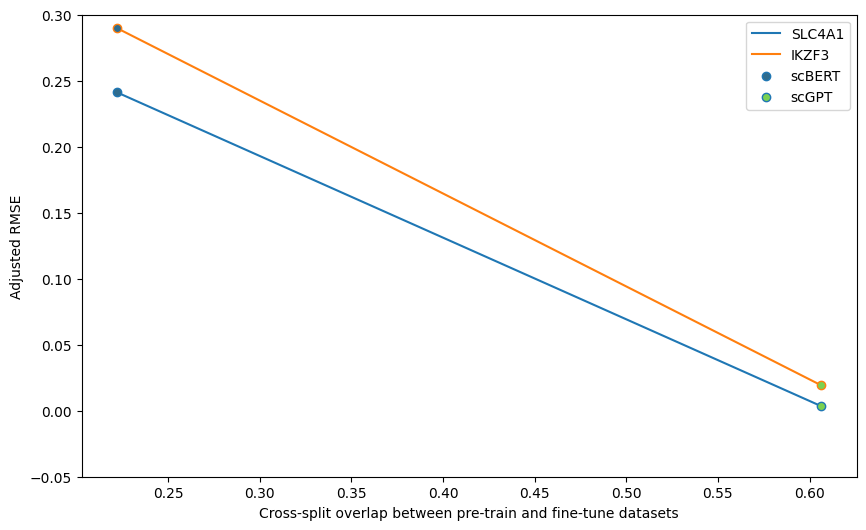

In [114]:
plt.figure(figsize=(10, 6))

plt.plot([cross_split_overlap['scbert'], cross_split_overlap['scgpt']], 
         [net_de_mses_dict_slc4a1['scbert'], net_de_mses_dict_slc4a1['scgpt']], 
         color='tab:blue', label='SLC4A1', zorder=1)

plt.plot([cross_split_overlap['scbert'], cross_split_overlap['scgpt']], 
         [net_de_mses_dict_ikzf3['scbert'], net_de_mses_dict_ikzf3['scgpt']], 
         color='tab:orange', label='IKZF3', zorder=1)

for model, net_de_mse in net_de_mses_dict_slc4a1.items():
    if model in ['scbert', 'scgpt']:
        model_name = 'scBERT' if model == 'scbert' else 'scGPT'
        plt.scatter(cross_split_overlap[model], net_de_mses_dict_slc4a1[model], label=model_name, color=model_colors_cso[model], edgecolor='tab:blue', zorder=2)

for model, net_de_mse in net_de_mses_dict_ikzf3.items():
    if model in ['scbert', 'scgpt']:
        model_name = 'scBERT' if model == 'scbert' else 'scGPT'
        plt.scatter(cross_split_overlap[model], net_de_mses_dict_ikzf3[model], color=model_colors_cso[model], edgecolor='tab:orange', zorder=2)

plt.ylabel('Adjusted MSE')
plt.ylim(-0.05, 0.30)
plt.xlabel('Cross-split overlap between pre-train and fine-tune datasets')
plt.legend()
plt.savefig('paper_figs/cross_split_overlap_full.pdf', dpi=300)
plt.show()